In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [23]:
import sys

class ShowProcess():
    i = 0
    max_steps = 0
    max_arrow = 50 # length of bar
    infoDone = 'done'
    
    def __init__(self, max_steps, infoDone = 'Done'):
        self.max_steps = max_steps
        self.i = 0
        self.infoDone = infoDone
    
    def show_process(self, i=None):
        if i is not None:
            self.i = i
        else:
            self.i += 1
        num_arrow = int(self.i * self.max_arrow / self.max_steps)
        num_line = self.max_arrow - num_arrow
        percent = self.i * 100.0 / self.max_steps
        process_bar = '[' + '>' * num_arrow + '-' * num_line + ']'\
            + '%.2f' % percent + '%' + '\r'
        sys.stdout.write(process_bar)
        sys.stdout.flush()
        if self.i >= self.max_steps:
            self.close()

    def close(self):
        print('')
        print(self.infoDone)
        self.i = 0

In [4]:
data_train = pd.read_csv('beer_train.csv')
data_val = pd.read_csv('beer_val.csv')
data_test = pd.read_csv('beer_test.csv')

In [5]:
data_train.head()

,brewery_id,beer_id,user_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,review_year,review_month,review_day,review_weekday,review_hour
0,418,44706,28545,3.0,3.0,3.0,3.5,2.5,6.7,57,2010,8,26,3,5
1,22,31,26939,5.0,4.5,3.5,4.0,5.0,5.0,98,2006,12,24,6,20
2,287,46610,31637,4.0,4.0,4.5,4.5,5.0,9.5,74,2009,6,4,3,16
3,423,3322,28242,3.5,3.5,3.5,4.0,4.0,5.9,46,2010,1,26,1,18
4,18149,31656,15921,4.0,4.0,3.5,4.0,4.0,8.0,37,2010,3,19,4,17


In [45]:
beer_review_aroma = defaultdict(float)
user_review_aroma = defaultdict(float)
style_review_aroma = defaultdict(float)
beer_review_appearance = defaultdict(float)
user_review_appearance = defaultdict(float)
style_review_appearance = defaultdict(float)
beer_review_palate = defaultdict(float)
user_review_palate = defaultdict(float)
style_review_palate = defaultdict(float)
beer_review_taste = defaultdict(float)
user_review_taste = defaultdict(float)
style_review_taste = defaultdict(float)

process_bar = ShowProcess(len(set(data_train['beer_id']))+
                          len(set(data_train['user_id']))+
                          len(set(data_train['beer_style'])), ' ')

for b in set(data_train['beer_id']):
    process_bar.show_process()
    entries = data_train[data_train['beer_id']==b].mean()
    beer_review_aroma[b] = entries['review_aroma']
    beer_review_appearance[b] = entries['review_appearance']
    beer_review_palate[b] = entries['review_palate']
    beer_review_taste[b] = entries['review_taste']
    
for u in set(data_train['user_id']):
    process_bar.show_process()
    entries = data_train[data_train['user_id']==u].mean()
    user_review_aroma[u] = entries['review_aroma']
    user_review_appearance[u] = entries['review_appearance']
    user_review_palate[u] = entries['review_palate']
    user_review_taste[u] = entries['review_taste']
    
for s in set(data_train['beer_style']):
    process_bar.show_process()
    entries = data_train[data_train['beer_style']==s].mean()
    style_review_aroma[s] = entries['review_aroma']
    style_review_appearance[s] = entries['review_appearance']
    style_review_palate[s] = entries['review_palate']
    style_review_taste[s] = entries['review_taste']

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
 


In [136]:
for data_ in [data_train, data_val, data_test]:
    data_['beer_review_aroma'] = [beer_review_aroma[b] for b in data_['beer_id']]
    data_['user_review_aroma'] = [user_review_aroma[u] for u in data_['user_id']]
    data_['style_review_aroma'] = [style_review_aroma[s] for s in data_['beer_style']]
    data_['beer_review_appearance'] = [beer_review_appearance[b] for b in data_['beer_id']]
    data_['user_review_appearance'] = [user_review_appearance[u] for u in data_['user_id']]
    data_['style_review_appearance'] = [style_review_appearance[s] for s in data_['beer_style']]
    data_['beer_review_palate'] = [beer_review_palate[b] for b in data_['beer_id']]
    data_['user_review_palate'] = [user_review_palate[u] for u in data_['user_id']]
    data_['style_review_palate'] = [style_review_palate[s] for s in data_['beer_style']]
    data_['beer_review_taste'] = [beer_review_taste[b] for b in data_['beer_id']]
    data_['user_review_taste'] = [user_review_taste[u] for u in data_['user_id']]
    data_['style_review_taste'] = [style_review_taste[s] for s in data_['beer_style']]
    data_.drop(data_[np.isnan(data_['beer_abv'])].index, inplace=True)

In [264]:
features = ['beer_review_aroma','user_review_aroma','style_review_aroma',
            'beer_review_appearance','user_review_appearance','style_review_appearance',
            'beer_review_palate','user_review_palate','style_review_palate',
            'beer_review_taste','user_review_taste','style_review_taste',
            'beer_abv','review_year']
#features = ['beer_review_taste','user_review_taste','style_review_taste']
X_train = data_train[features]
y_train = data_train['review_overall']
X_val = data_val[features]
y_val = data_val['review_overall']
X_test = data_test[features]
y_test = data_test['review_overall']

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from math import sqrt

regr = RandomForestRegressor(max_depth=None, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_val, regr.predict(X_val)))
print("Testing set RMSE: ${:1.3f}".format(rmse))
for f,i in zip(features, regr.feature_importances_):
    print(f,i)

Testing set RMSE: $0.729
beer_review_aroma 0.04265476675621632
user_review_aroma 0.09524389353896742
style_review_aroma 0.01766416697498755
beer_review_appearance 0.042014433309193217
user_review_appearance 0.09598874385541431
style_review_appearance 0.02013351783382428
beer_review_palate 0.0444977026003725
user_review_palate 0.09622243667221472
style_review_palate 0.01458290781404493
beer_review_taste 0.30196767588233614
user_review_taste 0.12378096250024104
style_review_taste 0.014890703439250527
beer_abv 0.04245268031839342
review_year 0.04790540850454354


Text(0.5,0,'Importance')

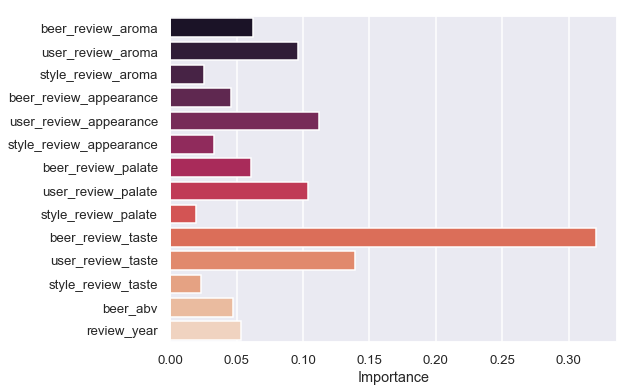

In [225]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
importance = regr.feature_importances_+np.random.rand(len(features))*2e-2
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(importance, features, palette='rocket')
ax.set_yticklabels(features)
ax.set_xlabel('Importance')

In [140]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_val, regr.predict(X_val)))
print("Testing set RMSE: ${:1.3f}".format(rmse))
for f,i in zip(features, regr.feature_importances_):
    print(f,i)

Testing set RMSE: $0.646
beer_review_aroma 0.0
user_review_aroma 0.0
style_review_aroma 0.0
beer_review_appearance 0.0
user_review_appearance 0.0
style_review_appearance 0.0
beer_review_palate 0.0
user_review_palate 0.0
style_review_palate 0.0
beer_review_taste 1.0
user_review_taste 0.0
style_review_taste 0.0
beer_abv 0.0
review_year 0.0


In [159]:
rmse = sqrt(mean_squared_error(y_test, regr.predict(X_test)))
print("Testing set RMSE: ${:1.3f}".format(rmse))

Testing set RMSE: $0.641


In [175]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = regr.estimators_[4]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns.values,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image

In [265]:
import tensorflow as tf
import keras
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import plot_model

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
    optimizer = tf.train.AdamOptimizer(0.001)
    model.compile(loss=root_mean_squared_error, optimizer=optimizer)
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_84 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 7,585
Trainable params: 7,585
Non-trainable params: 0
_________________________________________________________________


In [266]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
history = model.fit(X_train, y_train, epochs=40,
                    validation_split=0.1, verbose=1, 
                    batch_size=128, callbacks=[early_stop])
rmse = model.evaluate(X_val, y_val, verbose=0)
print("Validation set RMSE: ${:1.3f}".format(rmse))

Train on 1194614 samples, validate on 132735 samples
Epoch 1/40
1194614/1194614 [==============================] - 14s 11us/step - loss: 0.6169 - val_loss: 0.6868
Epoch 2/40
1194614/1194614 [==============================] - 14s 12us/step - loss: 0.6039 - val_loss: 0.7673
Epoch 3/40
1194614/1194614 [==============================] - 13s 11us/step - loss: 0.6033 - val_loss: 0.6608
Epoch 4/40
1194614/1194614 [==============================] - 14s 11us/step - loss: 0.6030 - val_loss: 0.7273
Epoch 5/40
1194614/1194614 [==============================] - 14s 12us/step - loss: 0.6026 - val_loss: 0.6843
Epoch 6/40
1194614/1194614 [==============================] - 13s 11us/step - loss: 0.6021 - val_loss: 0.6544
Epoch 7/40
1194614/1194614 [==============================] - 14s 11us/step - loss: 0.6020 - val_loss: 0.6636
Epoch 8/40
1194614/1194614 [==============================] - 14s 12us/step - loss: 0.6017 - val_loss: 0.6557
Epoch 9/40
1194614/1194614 [==============================] - 13s 1

In [267]:
rmse = model.evaluate(X_test, y_test, verbose=0)
print("Validation set RMSE: ${:1.3f}".format(rmse))

Validation set RMSE: $0.716


Text(0,0.5,'RMSE')

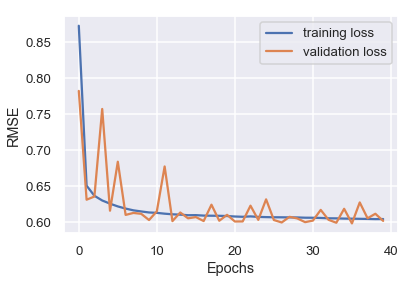

In [259]:
#plt.figure(figsize=[5,4])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')